In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
import argparse
from torchvision import models, transforms

In [6]:
#argument parser
#ap = argparse.ArgumentParser()
#ap.add_argument('-i', '--image', required=True, help='path to image')
#args = vars(ap.parse_args())

In [4]:
# load the model
model = models.resnet50(pretrained=True)
print(model)
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/sanghvi/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

In [7]:
len(model_children)

10

In [27]:
model_children[0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [28]:
model_children[4]

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [29]:
model_children[4][0]

Bottleneck(
  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (downsample): Sequential(
    (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [20]:
# counter to keep count of the conv layers
counter = 0 

# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 49


# Visualizing Convolutional Layer Filters

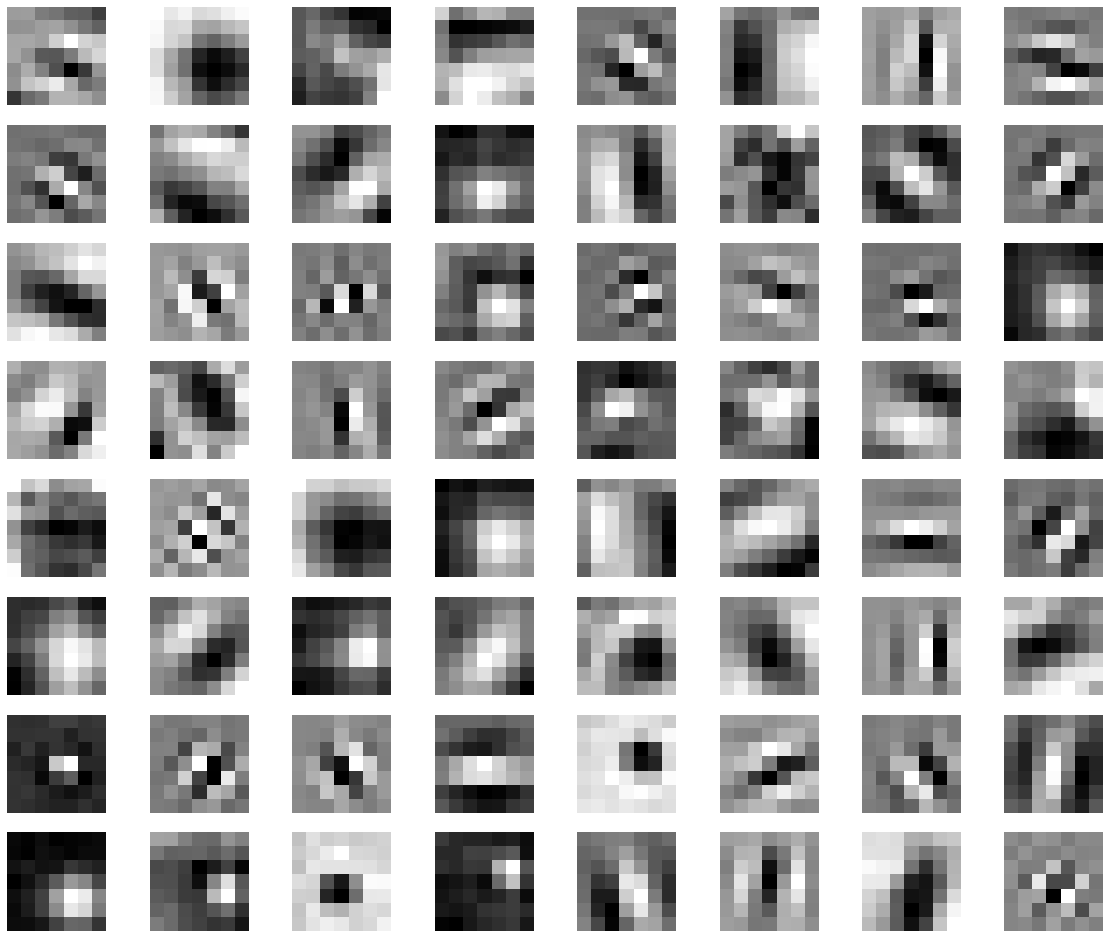

In [23]:
# visualize the filters of the first convolutional layer.

plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('outputs/filters.png')
plt.show()

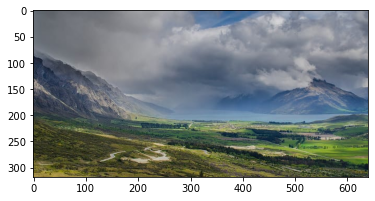

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [59]:
# read and visualize an image
img = cv.imread("input/image.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# define the transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

img = np.array(img)

# apply the transforms
img = transform(img)
print(img.size())

# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())

In [60]:
# pass the image through all the layers
results = [conv_layers[0](img)]

for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

# Visualizing Convolutional Layer Filters

torch.Size([64, 112, 112])


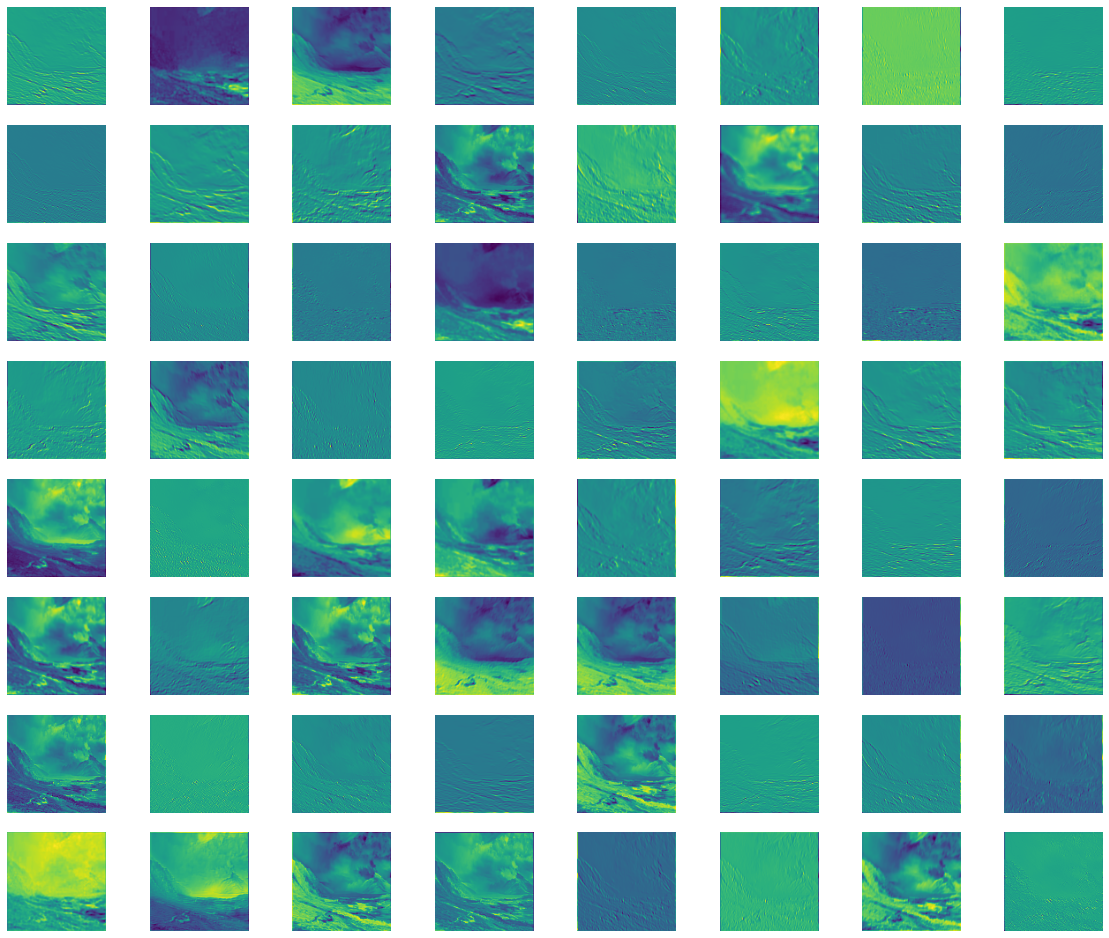

torch.Size([1, 64, 112, 112])


In [61]:
feature_maps = outputs[0][0, :, :, :]
feature_maps = feature_maps.data
print(feature_maps.size())

plt.figure(figsize=(20, 17))
for i, feature_map in enumerate(feature_maps):
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_map)
    plt.axis("off")
plt.show()

inputs = feature_maps.unsqueeze(0)
print(inputs.size())

# Restriction

In [116]:
#Restriction
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(64, 32, 1, 1)
        print(self.conv1.weight.shape)
        
    def forward(self,x):
        output=self.conv1(x)
        
        return output

In [117]:
model = NeuralNet()
restriction_result = model(inputs)
print(restriction_result.size())

torch.Size([32, 64, 1, 1])
torch.Size([1, 32, 112, 112])


In [118]:
restriction_result = restriction_result.squeeze(0)
print(restriction_result.size())

torch.Size([32, 112, 112])


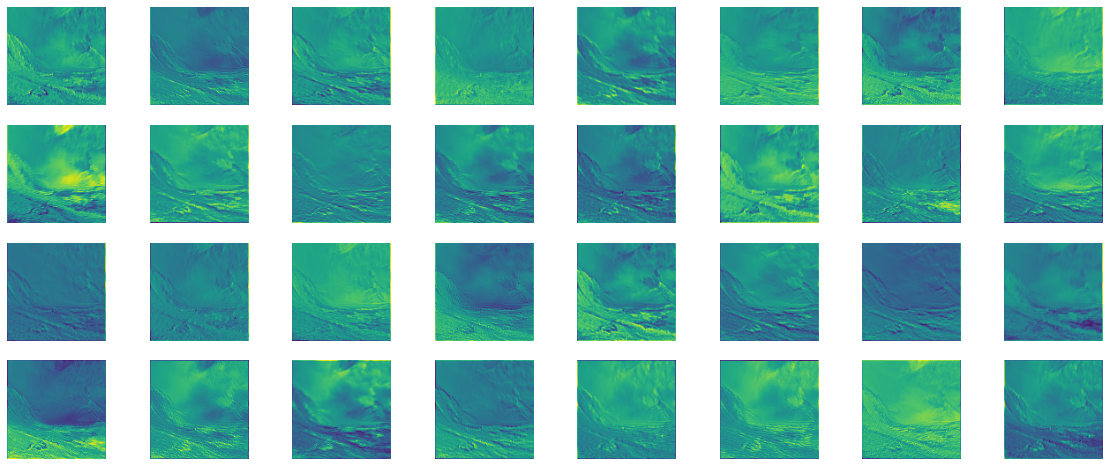

In [119]:
plt.figure(figsize=(20, 17))
for i, feature_map in enumerate(restriction_result):
    feature_map = feature_map.detach().numpy()
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_map)
    plt.axis("off")
plt.show()

In [120]:
for name, param in model.named_parameters(): 
    if param.requires_grad: 
        print(name), print(param.data.size())

conv1.weight
torch.Size([32, 64, 1, 1])
conv1.bias
torch.Size([32])


In [121]:
#Restriction
class NeuralNet_grouped(nn.Module):
    def __init__(self):
        super(NeuralNet_grouped, self).__init__()
        self.conv1 = nn.Conv2d(64, 32, 1, 1, groups=32)
        print(self.conv1.weight.shape)
        
    def forward(self,x):
        output=self.conv1(x)
        
        return output

In [122]:
model_grouped = NeuralNet_grouped()
restriction_result_grouped = model_grouped(inputs)
print(restriction_result_grouped.size())

torch.Size([32, 2, 1, 1])
torch.Size([1, 32, 112, 112])


In [123]:
restriction_result_grouped = restriction_result_grouped.squeeze(0)
print(restriction_result_grouped.size())

torch.Size([32, 112, 112])


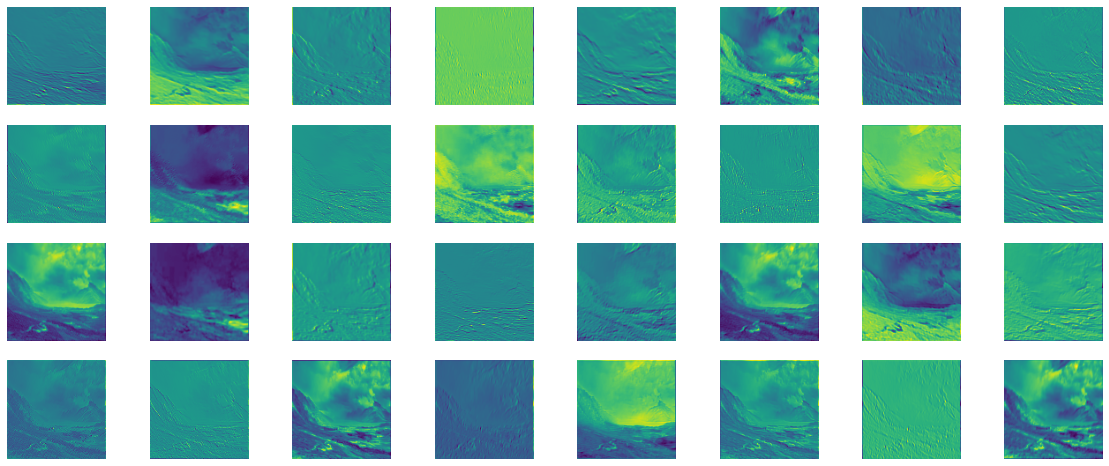

In [124]:
plt.figure(figsize=(20, 17))
for i, feature_map in enumerate(restriction_result_grouped):
    feature_map = feature_map.detach().numpy()
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_map)
    plt.axis("off")
plt.show()

In [125]:
for name, param in model_grouped.named_parameters(): 
    if param.requires_grad: 
        print(name), print(param.data.size())

conv1.weight
torch.Size([32, 2, 1, 1])
conv1.bias
torch.Size([32])


# Prolongation

In [92]:
#prolongation
class NeuralNet_pro(nn.Module):
    def __init__(self):
        super(NeuralNet_pro, self).__init__()
        self.conv1 = nn.Conv2d(32, 64, 1, 1)
        
    def forward(self,x):
        output=self.conv1(x)
        
        return output

In [94]:
model = NeuralNet_pro()
prolongation_result = model(restriction_result.unsqueeze(0))
print(prolongation_result.size())

torch.Size([1, 64, 112, 112])


In [95]:
prolongation_result = prolongation_result.squeeze(0)
print(prolongation_result.size())

torch.Size([64, 112, 112])


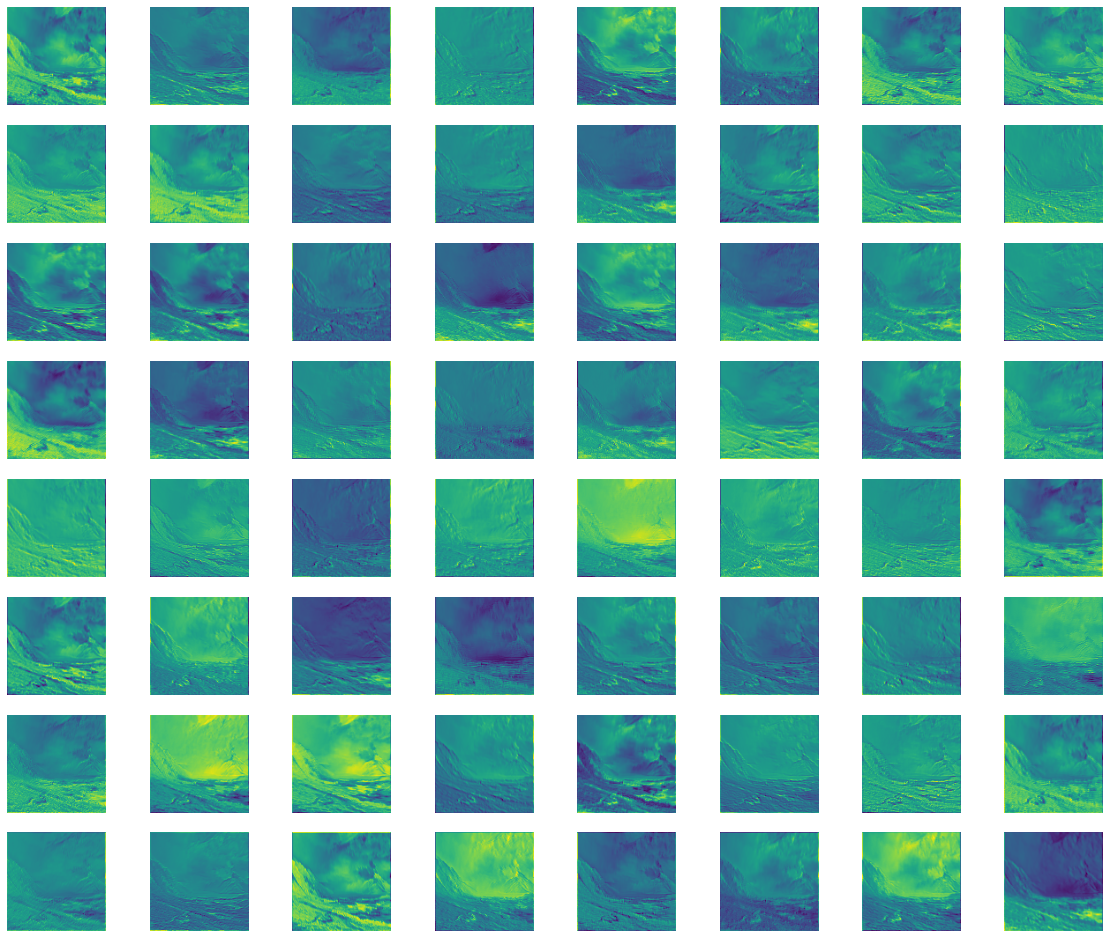

In [96]:
plt.figure(figsize=(20, 17))
for i, feature_map in enumerate(prolongation_result):
    feature_map = feature_map.detach().numpy()
    plt.subplot(8, 8, i + 1)
    plt.imshow(feature_map)
    plt.axis("off")
plt.show()

In [98]:
print(model)

NeuralNet_pro(
  (conv1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
)


In [105]:
for name, param in model.named_parameters(): 
    if param.requires_grad: 
        print(name), print(param.data.size())
        

conv1.weight
torch.Size([64, 32, 1, 1])
conv1.bias
torch.Size([64])
